In [20]:
import pandas as pd
import numpy as np

In [21]:
def compute_TP_TN_FP_FN( results_df, eps ):
    
    pos_dist_less_eps = np.array( results_df['PositiveDistances'] <= eps )
    TP = np.count_nonzero( pos_dist_less_eps )

    pos_dist_more_eps = np.array( results_df['PositiveDistances'] > eps )
    FN = np.count_nonzero( pos_dist_more_eps )

    neg_dist_less_eps = np.array( results_df['NegativeDistances'] < eps )
    FP = np.count_nonzero( neg_dist_less_eps )

    neg_dist_more_eps = np.array( results_df['NegativeDistances'] >= eps )
    TN = np.count_nonzero( neg_dist_more_eps )

    return TP, TN, FP, FN

In [23]:
def compute_precision_recall( TP, TN, FP, FN ):
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN )
    
    return precision, recall

## Results from VGG

In [11]:
results_from_vgg = pd.read_csv('signatures_similarity_vgg.csv')
results_from_vgg.drop( columns = 'Unnamed: 0', inplace = True )
print( results_from_vgg.shape )
results_from_vgg.head()

(10019, 2)


,PositiveDistances,NegativeDistances
0,30.260000,34.630001
1,20.610001,34.419998
2,34.639999,39.029999
3,38.840000,47.080002
4,27.950001,40.209999


In [12]:
results_from_vgg_rounded = results_from_vgg.round(0)
results_from_vgg_rounded.head()

,PositiveDistances,NegativeDistances
0,30.0,35.0
1,21.0,34.0
2,35.0,39.0
3,39.0,47.0
4,28.0,40.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002890CAC4438>,
      dtype=object)

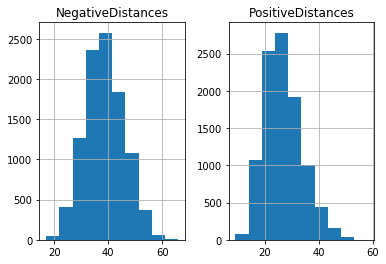

In [13]:
results_from_vgg_rounded.hist()

In [36]:
TP, TN, FP, FN = compute_TP_TN_FP_FN( results_from_vgg_rounded, 30 )
print( 'TP:', TP )
print( 'FN:', FN )
print( 'FP:', FP )
print( 'TN:', TN )

TP: 7316
FN: 2703
FP: 1073
TN: 8946


In [37]:
precision, recall = compute_precision_recall( TP, TN, FP, FN )

print( 'Precision =', round( precision * 100, 2 ) )
print( 'Recall =', round( recall * 100, 2 ) )

Precision = 87.21
Recall = 73.02


## Results from TNN

In [5]:
results_from_tnn = pd.read_csv('Triplet Loss/signatures_similarity_tnn.csv', )
results_from_tnn.drop( columns = 'Unnamed: 0', inplace = True )
print( results_from_tnn.shape )
results_from_tnn.head()

(10019, 2)


,PositiveDistances,NegativeDistances
0,1.53,5.77
1,1.74,2.88
2,2.61,4.73
3,3.04,5.55
4,3.25,7.16


In [6]:
results_from_tnn_rounded = results_from_tnn.round(0)
results_from_tnn_rounded.head()

,PositiveDistances,NegativeDistances
0,2.0,6.0
1,2.0,3.0
2,3.0,5.0
3,3.0,6.0
4,3.0,7.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002890CC8C240>,
      dtype=object)

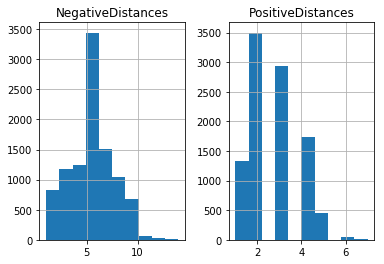

In [7]:
results_from_tnn_rounded.hist()

In [26]:
TP, TN, FP, FN = compute_TP_TN_FP_FN( results_from_tnn_rounded, 4 )

print( 'TP:', TP )
print( 'FN:', FN )
print( 'FP:', FP )
print( 'TN:', TN )

TP: 9510
FN: 509
FP: 2005
TN: 8014


In [27]:
precision, recall = compute_precision_recall( TP, TN, FP, FN )

print( 'Precision =', round( precision * 100, 2 ) )
print( 'Recall =', round( recall * 100, 2 ) )

Precision = 82.59
Recall = 94.92
